**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [1]:
# To read data from diamonds.csv
import pandas as pd
import numpy
from numpy import asarray
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import normalize

headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
#data = data.reset_index(drop=True)

data = data.iloc[1:,:]

#print(type(data))

d_cut = {"Ideal":5,"Premium":4,"Very Good":3,"Good":2,"Fair":1}
d_color = {"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1}
d_clarity = {"IF":8,"VVS1":7,"VVS2":6,"VS1":5,"VS2":4,"SI1":3,"SI2":2,"I1":1}


data["cut"] = data["cut"].map(d_cut)
data["color"] = data["color"].map(d_color)
data["clarity"] = data["clarity"].map(d_clarity)


max_price_global = data["price"].values.astype(numpy.double).max()
print("max_price is ",max_price_global)

n = data.values.astype(numpy.double)
n = n / n.max(axis=0) #normalise data


X_train , X_test = train_test_split(n, test_size=0.1, random_state=42)

# print(X_train[:10])
# print(X_test[:10])

max_price is  4649.0




```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [8]:
# code for knn regression
import math
import operator
import heapq as hq


def euclidean_distance(row1, row2):
    row1 = numpy.delete(row1, 6)  
    row2 = numpy.delete(row2, 6)  
    
    sum_sq = numpy.sum(numpy.square(row1 - row2))
    distance = numpy.sqrt(sum_sq)
    return distance

def hamming_distance(row1,row2):
    row1 = numpy.delete(row1, 6)
    row2 = numpy.delete(row2, 6)

    d=0
    for i in range (0,len(row1)):
        if abs(row1[i]-row2[i])>0.05:
            d+=1
    return d

def manhattan_distance(row1,row2):
    row1 = numpy.delete(row1, 6)
    row2 = numpy.delete(row2, 6)

    d=0
    for i in range (0,len(row1)):
        d+=abs(row1[i]-row2[i])
    return d


class DD(object):
    def __init__(self,dist,price):
        self.dist = dist
        self.price = price
    def __lt__(self,other):
        if self.dist>other.dist:
            return True

dist_euclidean = []
dist_hamming = []
dist_manhattan = []

count = 0

for row_xtest in X_test:
    
    count=count+1
    if(count%10==0):
        print(count)
    
    tuple_list_e = []
    tuple_list_h = []
    tuple_list_m = []
    
    for row_xtrain in X_train:
        dist_e = euclidean_distance(row_xtest,row_xtrain)
        dist_m = manhattan_distance(row_xtest,row_xtrain)
        dist_h = hamming_distance(row_xtest,row_xtrain)
        
        if(len(tuple_list_e)<16):
            hq.heappush(tuple_list_e,DD(dist_e,row_xtrain[6]))
        else:
            hq.heappush(tuple_list_e,DD(dist_e,row_xtrain[6]))
            hq.heappop(tuple_list_e)

        if(len(tuple_list_m)<16):
            hq.heappush(tuple_list_m,DD(dist_m,row_xtrain[6]))
        else:
            hq.heappush(tuple_list_m,DD(dist_m,row_xtrain[6]))
            hq.heappop(tuple_list_m)

        if(len(tuple_list_h)<16):
            hq.heappush(tuple_list_h,DD(dist_h,row_xtrain[6]))
        else:
            hq.heappush(tuple_list_h,DD(dist_h,row_xtrain[6]))
            hq.heappop(tuple_list_h)



    dist_euclidean.append((row_xtest[6],tuple_list_e))
    dist_hamming.append((row_xtest[6],tuple_list_h))
    dist_manhattan.append((row_xtest[6],tuple_list_m))

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

my_price_list_e=[]
predicted_price_list_e = []

my_price_list_h=[]
predicted_price_list_h = []

my_price_list_m=[]
predicted_price_list_m = []

for price_dist in dist_euclidean:
    my_price_list_e.append(price_dist[0]*max_price_global)
    pred_list =  price_dist[1]
    price_l = hq.nlargest(16,pred_list)
    
    prices = []
    for it in price_l:
        prices.append(it.price)
        
        
    predicted_price_list_e.append(prices) 
    

for price_dist in dist_hamming:
    my_price_list_h.append(price_dist[0]*max_price_global)
    pred_list =  price_dist[1]
    price_l = hq.nlargest(16,pred_list)
    prices = []
    for it in price_l:
        prices.append(it.price)
        
    
    predicted_price_list_h.append(prices) 
    


for price_dist in dist_manhattan:
    my_price_list_m.append(price_dist[0]*max_price_global)
    pred_list =  price_dist[1]
    price_l = hq.nlargest(16,pred_list)
    prices = []
    for it in price_l:
        prices.append(it.price)
        
    predicted_price_list_m.append(prices) 


print("my price list euc ",my_price_list_e)
print("pred price list euc ",predicted_price_list_e)

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


list_k = [2,3,5,7,11,16]
mean_abs_e = []
mean_square_e = []
r2_e = []

mean_abs_h = []
mean_square_h = []
r2_h = []

mean_abs_m = []
mean_square_m = []
r2_m = []

for k in list_k:
    temp_e_prices = []
    temp_h_prices = []
    temp_m_prices = []

    for i in range (0,len(my_price_list_e)):
        temp_e_prices.append((sum(predicted_price_list_e[i][:k])/k)*max_price_global)

    for i in range (0,len(my_price_list_h)):
        temp_h_prices.append((sum(predicted_price_list_h[i][:k])/k)*max_price_global)

    for i in range (0,len(my_price_list_m)):
        temp_m_prices.append((sum(predicted_price_list_m[i][:k])/k)*max_price_global)


    mean_abs_e.append(mean_absolute_error(my_price_list_e,temp_e_prices))
    mean_square_e.append(mean_squared_error(my_price_list_e,temp_e_prices))
    r2_e.append(r2_score(my_price_list_e,temp_e_prices))

    mean_abs_m.append(mean_absolute_error(my_price_list_m,temp_m_prices))
    mean_square_m.append(mean_squared_error(my_price_list_m,temp_m_prices))
    r2_m.append(r2_score(my_price_list_m,temp_m_prices))

    mean_abs_h.append(mean_absolute_error(my_price_list_h,temp_h_prices))
    mean_square_h.append(mean_squared_error(my_price_list_h,temp_h_prices))
    r2_h.append(r2_score(my_price_list_h,temp_h_prices))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960


1. b) Do we need to normalise data? [If so Does it make any difference?].


In [10]:
print("**Euclidean**")
print("R2 score",r2_e)
print("MAE ",mean_abs_e)
print("MSE ",mean_square_e)
print("**Hamming**")
print("R2 score ",r2_h)
print("MAE ",mean_abs_h)
print("MSE ",mean_square_h)
print("Manhattan")
print("R2 score ",r2_m)
print("MAE ",mean_abs_m)
print("MSE ",mean_square_m)

Euclidean
[0.9251398449483613, 0.9308552998479369, 0.9343740707859329, 0.934052403332376, 0.930850728600291, 0.9242227258955211]
[212.78895768833848, 208.84554523563813, 205.80371517027865, 206.8139466312841, 214.8376020264565, 225.109455624355]
[94909.0859133127, 87662.92672858617, 83201.76400412797, 83609.57993723804, 87668.72224070142, 96071.82637142026]
Hamming
[0.9027783735016934, 0.9153097412883967, 0.9260860826319376, 0.9273226551506953, 0.9269695221346844, 0.9253074164093187]
[255.24458204334366, 238.99896800825593, 225.5684210526316, 226.29367536488277, 229.8541138943616, 233.4607843137255]
[123259.37203302374, 107371.87272101823, 93709.42831785347, 92141.67886101811, 92589.38741481803, 94696.63572303922]
Manhattan
[0.9253537583062957, 0.9323718783779885, 0.9386037684867526, 0.9375554396525422, 0.9342016518055672, 0.9314264337316878]
[209.37409700722395, 205.14138286893706, 200.51186790505676, 203.03361344537814, 207.2336992213153, 214.14299535603715]
[94637.88261093911, 85740

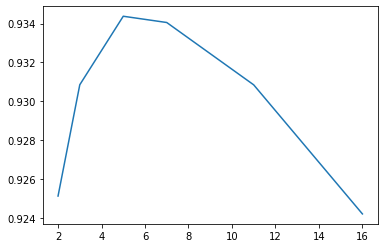

In [5]:
from matplotlib import pyplot as plt
# list_k = [2,3,5,7,11,16]
# r2_e = [0.9251398449483613, 0.9308552998479369, 0.9343740707859329, 0.934052403332376, 0.930850728600291, 0.9242227258955211]
plt.plot(list_k,r2_e)

In [ ]:
# give proper explanation
Yes we need to normalize the data otherwise the data with larger numerical values will dominate the distance calculation and alone will overpower the other parameters .The same data may simply be scaled by a certain (+ve)factor and it will have more effect than unscaled data . For this reason we need to bring all data columns on the same scale.    

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [ ]:
# show all the experiments

3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [ ]:
# report a table

4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

In [ ]:
# plot

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

In [ ]:
# Explanation

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [3]:
# scikit-learn KNN Regressor
import pandas as pd
import numpy
from numpy import asarray
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import normalize

headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds_u.csv', na_values='?',    
         header=None,  names = headers) 
#data = data.reset_index(drop=True)

data = data.iloc[1:,:]

#print(type(data))

d_cut = {"Ideal":5,"Premium":4,"Very Good":3,"Good":2,"Fair":1}
d_color = {"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1}
d_clarity = {"IF":8,"VVS1":7,"VVS2":6,"VS1":5,"VS2":4,"SI1":3,"SI2":2,"I1":1}



data["cut"] = data["cut"].map(d_cut)
data["color"] = data["color"].map(d_color)
data["clarity"] = data["clarity"].map(d_clarity)

X = data[['carat','cut','color','clarity','depth','table','x','y','z']]
Y = data[['price']]




#data.drop(columns=['carat'],axis = 1)
print(X.shape)
print(Y.shape)


X = X.values.astype(numpy.double)
Y = Y.values.astype(numpy.double)
X = X / X.max(axis=0) #normalise data
Y = Y
max_price_global = Y.max()
# print(X)
# print(Y)
# print(X[:10])
# print(Y[:10])
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.1, random_state=42)


from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model=KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
 
mae = mean_absolute_error(Y_test,prediction)
mse = mean_squared_error(Y_test,prediction)
r2 = r2_score(Y_test,prediction)
 
print("MAE:",mae)
print("MSE:", mse)
print("R-Squared:", r2)

(1388, 9)
(1388, 1)
MAE: 61.5323741007194
MSE: 6424.597122302157
R-Squared: 0.9954121178640387


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [ ]:
# Comparison
Both the readings are alost the same although the sklearn algorithm takes considerably less time . This is because of the internal optimizations of sklearn in data localization. Also sklearn is written partly in C and C++ for this reason it is faster.

Also the sklearn model is closest to euclidean distance values so internally that is what it must be using.

6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


In [ ]:
# report this  along with the experiments
Advantages :
1.Easy to undrstand and code
2.Works on non linear data

Disadvantages:
1.Susceptible to outliers
2.Takes time to find distances with all points 

# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [6]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
#data = data.reset_index(drop=True)
#print(type(data))

data = data.iloc[1:,:]

#print(type(data))

d_cut = {"Ideal":4,"Premium":3,"Very Good":2,"Good":1,"Fair":0}
d_color = {"D":6,"E":5,"F":4,"G":3,"H":2,"I":1,"J":0}
d_clarity = {"IF":7,"VVS1":6,"VVS2":5,"VS1":4,"VS2":3,"SI1":2,"SI2":1,"I1":0}
 



data["cut"] = data["cut"].map(d_cut)
data["color"] = data["color"].map(d_color)
data["clarity"] = data["clarity"].map(d_clarity)

X = data[['carat','cut','color','clarity','depth','table','x','y','z']]
Y = data[['price']]

X = X.values.astype(np.double)
Y = Y.values.astype(np.double)

sc = StandardScaler()
X = sc.fit_transform(X)


def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
        #print(iteration)
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
    
    return B, cost_history

m = 7000

X_train = X[:m,]
X_train = np.c_[np.ones(len(X_train),dtype='int32'),X_train]
Y_train = Y[:m]
X_test = X[m:,]
X_test = np.c_[np.ones(len(X_test),dtype='int32'),X_test]
Y_test = Y[m:]
B = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]
iters = 2000
alpha = 0.15

new_B , ch_ = batch_gradient_descent(X_train,Y_train,B,alpha,iters)

In [7]:
pp = X_test.dot(new_B)
print(Y_test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(Y_test,pp)
mse = mean_squared_error(Y_test,pp)
r2 = r2_score(Y_test,pp)

print(mae , " ", mse, " ",r2)

print(mae , " ", mse, " ",r2)

968
1418.9726440937065   2252757.998603862   -0.9606402703172676


2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

            carat       cut     color   clarity     depth     table         x  \
carat    1.000000  0.200021  0.238997  0.524673  0.078742  0.204428  0.979519   
cut      0.200021  1.000000  0.004770  0.149797  0.285788  0.399660  0.129671   
color    0.238997  0.004770  1.000000  0.013947  0.044541  0.004495  0.191220   
clarity  0.524673  0.149797  0.013947  1.000000  0.045919  0.153935  0.469875   
depth    0.078742  0.285788  0.044541  0.045919  1.000000  0.272991  0.038975   
table    0.204428  0.399660  0.004495  0.153935  0.272991  1.000000  0.199794   
x        0.979519  0.129671  0.191220  0.469875  0.038975  0.199794  1.000000   
y        0.974525  0.127432  0.186137  0.461174  0.045663  0.188698  0.995606   
z        0.958500  0.195400  0.192057  0.454736  0.202937  0.118039  0.948786   

                y         z  
carat    0.974525  0.958500  
cut      0.127432  0.195400  
color    0.186137  0.192057  
clarity  0.461174  0.454736  
depth    0.045663  0.202937  
table    

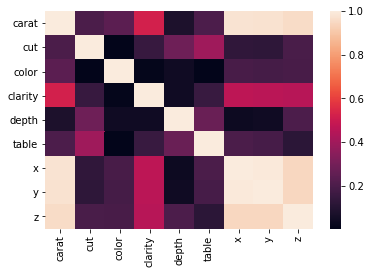

In [14]:
#code for Correlation between features and the Diamond Price.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


new_data = data.values.astype(np.float)
new_data = pd.DataFrame(X, columns = ['carat','cut','color','clarity','depth','table','x','y','z'])
corr = new_data.corr().abs()
# Select upper triangle of correlation matrix
sns.heatmap(corr)

print(corr)

Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# X_train = X[:1000]
# X_test = X[1000:]
# Y_train = Y[:1000]
# Y_test = Y[1000:]

import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)


y_pred_from_sklearn = lm.predict(X_test)




mae = mean_absolute_error(Y_test,y_pred_from_sklearn)
mse = mean_squared_error(Y_test,y_pred_from_sklearn)
r2 = r2_score(Y_test,y_pred_from_sklearn)

print(mae , " ", mse, " ",r2)

703.9328409692242   726363.1649084012   0.3678251845617163


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


Explanation - 

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


In [ ]:
#plot 

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [4]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-08 21:46:20--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  8.21MB/s    in 4m 12s  

2021-02-08 21:50:33 (661 KB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [3]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

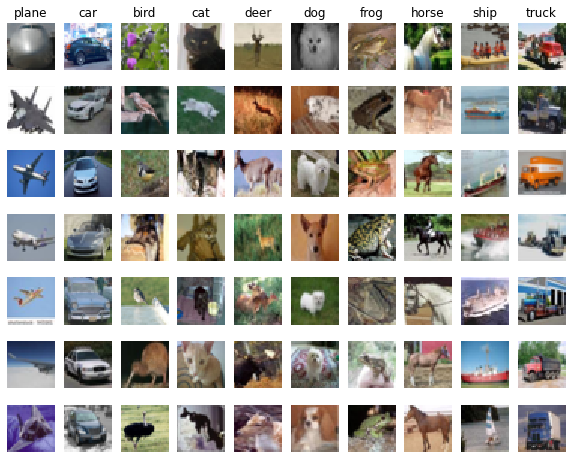

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [19]:
# Subsample the data for more efficient code execution in this exercise
num_training = 500
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 5
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(500, 3072) (5, 3072)
(500,) (5,)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [22]:
import numpy as np
import pickle
import os
#from settings import PROJECT_ROOT
import sys
import platform
class KNearestNeighbor(object):
  def __init__(self,X,y):
    self.X_train = X
    self.y_train = y
    print("x_train is ",X_train)
    print("y_train is ",y_train)

  def predict(self, X_test,k):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X_test.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.y_train.dtype)
    
    # loop over all test rows
    for i in range(num_test):
        print("iteration ",i)
        # find the nearest training image to the i'th test image
        # using the L1 distance (sum of absolute value differences)
        label_count = np.zeros(10,dtype=self.y_train.dtype)
        print("label count is ",label_count)
        distances = np.sum(np.abs(X_test[i,:]-X_train), axis = 1)
        print("distances are ",distances)
        idx = np.argpartition(distances,k)
        min_ind = idx[:k]
        print("min_ind are ",min_ind)
        
        for x in min_ind:
            label_count[int(self.y_train[x])] +=1
        print("label_count is ",label_count)
        Ypred[i] = np.argmax(label_count)
        

    return Ypred  



print("X_train dimensions are ",X_train.shape)
print("y_train shape ",y_train.shape)

nn = KNearestNeighbor(X_train,y_train) # create a Nearest Neighbor classifier class
Yte_predict = nn.predict(X_test,4) # predict labels on the test images
# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print ('accuracy: %f' % ( np.mean(Yte_predict == y_test) ))

X_train dimensions are  (500, 3072)
y_train shape  (500,)
x_train is  [[ 59.  62.  63. ... 123.  92.  72.]
 [154. 177. 187. ... 143. 133. 144.]
 [255. 255. 255. ...  80.  86.  84.]
 ...
 [164. 172. 182. ... 140. 143. 158.]
 [206. 164. 142. ... 179. 144. 141.]
 [109. 174. 224. ... 118. 141. 158.]]
y_train is  [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6 4 3 6 6 2 6 3 5 4 0 0 9 1 3 4 0 3
 7 3 3 5 2 2 7 1 1 1 2 2 0 9 5 7 9 2 2 5 2 4 3 1 1 8 2 1 1 4 9 7 8 5 9 6 7
 3 1 9 0 3 1 3 5 4 5 7 7 4 7 9 4 2 3 8 0 1 6 1 1 4 1 8 3 9 6 6 1 8 5 2 9 9
 8 1 7 7 0 0 6 9 1 2 2 9 2 6 6 1 9 5 0 4 7 6 7 1 8 1 1 2 8 1 3 3 6 2 4 9 9
 5 4 3 6 7 4 6 8 5 5 4 3 1 8 4 7 6 0 9 5 1 3 8 2 7 5 3 4 1 5 7 0 4 7 5 5 1
 0 9 6 9 0 8 7 8 8 2 5 2 3 5 0 6 1 9 3 6 9 1 3 9 6 6 7 1 0 9 5 8 5 2 9 0 8
 8 0 6 9 1 1 6 3 7 6 6 0 6 6 1 7 1 5 8 3 6 6 8 6 8 4 6 6 1 3 8 3 4 1 7 1 3
 8 5 1 1 4 0 9 3 7 4 9 9 2 4 9 9 1 0 5 9 0 8 2 1 2 0 5 6 3 2 7 8 8 6 0 7 9
 4 5 6 4 2 1 1 2 1 5 9 9 0 8 4 1 1 6 3 3 9 0 7 9 7 7 9 1 5 1 6 6 8 7 1 3 0
 3 3 2 4 5 7 5 

In [ ]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [ ]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [ ]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [ ]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

In [ ]:
# Use this cell to compute accuracies for k = 3, 5, 7

Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [ ]:
# Use this cell to call the functions

Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [ ]:
# Use this cell to present your timing results for computing distance matrix

As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [ ]:
# Use this cell to implement Cross Validation

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [1]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [ ]:
import pandas as pd
import numpy
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data = data.astype(numpy.float)



feature_names = [ "CT", "UCSize","UCShape" ,"MA","SECSize","BN","BC","NN","Mitoses"]

def entropy_func(c, n):
    """
    The math formula
    """
    return -(c*1.0/n)*math.log(c*1.0/n, 2)

def entropy_cal(c1, c2):
    """
    Returns entropy of a group of data
    c1: count of one class
    c2: count of another class
    """
    if c1== 0 or c2 == 0:  # when there is only one class in the group, entropy is 0
        return 0
    return entropy_func(c1, c1+c2) + entropy_func(c2, c1+c2)

# get the entropy of one big circle showing above
def entropy_of_one_division(division): 
    """
    Returns entropy of a divided group of data
    Data may have multiple classes
    """
    s = 0
    n = len(division)
    classes = set(division)
    for c in classes:   # for each class, get entropy
        n_c = sum(division==c)
        e = n_c*1.0/n * entropy_cal(sum(division==c), sum(division!=c)) # weighted avg
        s += e
    return s, n

# The whole entropy of two big circles combined
def get_entropy(y_predict, y_real):
    """
    Returns entropy of a split
    y_predict is the split decision, True/Fasle, and y_true can be multi class
    """
    print("y_real is ",y_real)
    if len(y_predict) != len(y_real):
        print('They have to be the same length')
        return None
    n = len(y_real)
    s_true, n_true = entropy_of_one_division(y_real[y_predict]) # left hand side entropy
    s_false, n_false = entropy_of_one_division(y_real[~y_predict]) # right hand side entropy
    s = n_true*1.0/n * s_true + n_false*1.0/n * s_false 
    return s

class DecisionTreeClassifier(object):
    def __init__(self, max_depth):
        self.depth = 0
        self.max_depth = max_depth
    
    def fit(self, x, y, par_node={}, depth=0):

        if par_node is None: 
            return None
        elif len(y) == 0:
            return None
        elif self.all_same(y):
            return {'val':y[0]}
        elif depth >= self.max_depth:
            return None
        else: 
            col, cutoff, entropy = self.find_best_split_of_all(x, y) 
            y_left = y[x[:, col] < cutoff]
            y_right = y[x[:, col] >= cutoff]
            par_node = {'col': feature_names[col], 'index_col':col,
                        'cutoff':cutoff,
                       'val': np.round(np.mean(y))}
            par_node['left'] = self.fit(x[x[:, col] < cutoff], y_left, {}, depth+1)
            par_node['right'] = self.fit(x[x[:, col] >= cutoff], y_right, {}, depth+1)
            self.depth += 1 
            self.trees = par_node
            return par_node
    
    def find_best_split_of_all(self, x, y):
        col = None
        min_entropy = 1
        cutoff = None
        for i, c in enumerate(x.T):
            print("column is ",c)
            entropy, cur_cutoff = self.find_best_split(c, y)
            if entropy == 0:    # find the first perfect cutoff. Stop Iterating
                return i, cur_cutoff, entropy
            elif entropy <= min_entropy:
                min_entropy = entropy
                col = i
                cutoff = cur_cutoff
        return col, cutoff, min_entropy
    
    def find_best_split(self, col, y):
        min_entropy = 10
        n = len(y)
        
        for value in set(col):
            print("val is ",value)
            print("col is ",col)
            y_predict = col < value
            print("y predict is ",y_predict)
            my_entropy = get_entropy(y_predict, y)
            if my_entropy <= min_entropy:
                min_entropy = my_entropy
                cutoff = value
        return min_entropy, cutoff
    
    def all_same(self, items):
        return all(x == items[0] for x in items)
                                           
    def predict(self, x):
        tree = self.trees
        results = np.array([0]*len(x))
        for i, c in enumerate(x):
            results[i] = self._get_prediction(c)
        return results
    
    def _get_prediction(self, row):
        cur_layer = self.trees
        while cur_layer.get('cutoff'):
            if row[cur_layer['index_col']] < cur_layer['cutoff']:
                cur_layer = cur_layer['left']
            else:
                cur_layer = cur_layer['right']
        else:
            return cur_layer.get('val')

from sklearn.datasets import load_iris
from pprint import pprint
import math
import numpy as np


headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)

data.describe()
x = data.drop(["Diagnosis"],axis=1)
x = x.values.astype(numpy.double)
y = data["Diagnosis"].values.astype(numpy.double)

clf = DecisionTreeClassifier(max_depth=7)
m = clf.fit(x, y)

pprint(m)

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

1. e) Does standardisation and normalisation help in this case? Report

Answer:

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

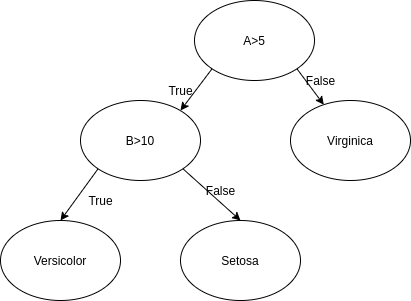
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

5. Report the advantages and disadvantages of decision trees based on the above question.

Answer: